## Project 1


### Import Dependencies

In [87]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from datetime import date
from yahoo_earnings_calendar import YahooEarningsCalendar
from MCForecastTools import MCSimulation

In [88]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [89]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
print(alpaca_secret_key)

FesmNDEd6cY4l59Bh7JmBjDNOBlZQFZrurblQsiA


### Dynamically Pull Stocks Based on Earnings Date

In [90]:
start_time = today.strftime("%b %d %Y") + " 10:00AM"
tomorrow = today + datetime.timedelta(days = 1) 
end_time = tomorrow.strftime("%b %d %Y") + " 10:00AM"

date_from = datetime.datetime.strptime(
    start_time, '%b %d %Y %I:%M%p')
date_to = datetime.datetime.strptime(
    end_time, '%b %d %Y %I:%M%p')
yec = YahooEarningsCalendar()
stock_earnings = yec.earnings_between(date_from, date_to)

In [91]:
stock_list = [{'ticker': ticker['ticker'], 'epsestimate': ticker['epsestimate']} for ticker in stock_earnings if ticker['epsestimate']]

tickers = []
for i in stock_list:
    tickers.append((i["ticker"]))
    print(i)


{'ticker': 'AGX', 'epsestimate': 0.31}
{'ticker': 'AZO', 'epsestimate': 17.77}
{'ticker': 'GIII', 'epsestimate': 0.77}
{'ticker': 'AVAV', 'epsestimate': 0.31}
{'ticker': 'HRB', 'epsestimate': -0.94}
{'ticker': 'CMD', 'epsestimate': 0.37}
{'ticker': 'GME', 'epsestimate': -0.85}
{'ticker': 'CONN', 'epsestimate': 0.24}
{'ticker': 'CHWY', 'epsestimate': -0.13}
{'ticker': 'GEENQ', 'epsestimate': -14.06}
{'ticker': 'FGPR', 'epsestimate': -0.34}
{'ticker': 'GWRE', 'epsestimate': -0.05}
{'ticker': 'THO', 'epsestimate': 1.56}
{'ticker': 'POWL', 'epsestimate': 0.26}
{'ticker': 'LQDT', 'epsestimate': 0.01}
{'ticker': 'ADBE', 'epsestimate': 2.66}
{'ticker': 'DBI', 'epsestimate': -0.48}
{'ticker': 'VRA', 'epsestimate': 0.24}
{'ticker': 'CMTL', 'epsestimate': -1.78}
{'ticker': 'CPB', 'epsestimate': 0.91}
{'ticker': 'UNFI', 'epsestimate': 0.74}
{'ticker': 'GNSS', 'epsestimate': 0.03}
{'ticker': 'GEF', 'epsestimate': 0.72}
{'ticker': 'SNEX', 'epsestimate': 1.45}
{'ticker': 'PLAB', 'epsestimate': 0.15}

In [92]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

ADBE                                       AGX  \
                             open      high     low   close   volume   open   
time                                                                          
2019-05-01 04:00:00+00:00  291.00  291.0000  283.19  283.27  1792083  48.15   
2019-05-02 04:00:00+00:00  283.14  284.5900  278.15  279.69  2261267  47.95   
2019-05-03 04:00:00+00:00  282.56  286.3500  282.39  285.54  1664523  47.69   
2019-05-06 04:00:00+00:00  277.60  284.2165  275.81  283.66  1343261  48.18   
2019-05-07 04:00:00+00:00  278.82  280.6500  273.67  276.99  2188996  48.10   

                                                         ...    VRA         \
                            high    low  close   volume  ...   open   high   
time                                                     ...                 
2019-05-01 04:00:00+00:00  48.97  47.95  48.16  63758.0  ...  12.36  12.51   
2019-05-02 04:00:00+00:00  48.30  46.34  47.52  72330.0  ...  12.41  12.56   
2019-05-03 04:00:00+00:00  48.85  47.59  48.82  73391.0  ...  12.60  12.72   
2019-05-06 04:00:00+00:00  48.87  48.18  48.61  62021.0  ...  12.46  12.59   
2019-05-07 04:00:00+00:00  49.75  47.71  48.03  61097.0  ...  12.38  12.54   

                                                  VRNT                    \
                             low  close  volume   open     high      low   
time                                                                       
2019-05-01 04:00:00+00:00  12.28  12.40  163073  60.56  60.7978  59.8447   
2019-05-02 04:00:00+00:00  12.34  12.55  205049  60.02  60.6800  59.5250   
2019-05-03 04:00:00+00:00  12.44  12.67  224250  60.59  61.2950  60.3500   
2019-05-06 04:00:00+00:00  12.32  12.51  100119  60.37  62.4800  60.0350   
2019-05-07 04:00:00+00:00  12.16  12.28  187638  61.75  62.1800  61.0000   

                                            
                           close    volume  
time                                        
2019-05-01 04:00:00+00:00  60.05  302653.0  
2019-05-02 04:00:00+00:00  60.26  279836.0  
2019-05-03 04:00:00+00:00  61.29  298509.0  
2019-05-06 04:00:00+00:00  62.43  486547.0  
2019-05-07 04:00:00+00:00  62.11  434200.0  

[5 rows x 140 columns]

In [14]:
### Dynamically Generate Weights 

In [46]:
weight_pct = round(100/len(tickers)/100,2)

weight_list = []

for i in range(len(tickers)):
    weight_list.append(weight_pct)

print(weight_list)

[0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07]


### The MCForecastTools Library at a Glance

### Simulate five year portfolio growth using Monte Carlo simulation

In [47]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = weight_list,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [48]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AVGO                                      \
                             open     high       low   close   volume   
time                                                                    
2019-05-01 00:00:00-04:00  320.50  323.200  318.6861  318.83  1473223   
2019-05-02 00:00:00-04:00  319.98  322.185  314.2300  315.83  1573123   
2019-05-03 00:00:00-04:00  314.95  316.650  310.6900  315.68  1474753   
2019-05-06 00:00:00-04:00  306.79  311.930  305.3500  311.57  1274893   
2019-05-07 00:00:00-04:00  308.65  309.615  303.7300  307.29  1570489   

                                         CIEN                       ...  SEAC  \
                          daily_return   open   high    low  close  ...   low   
time                                                                ...         
2019-05-01 00:00:00-04:00          NaN  38.57  39.07  38.25  38.38  ...  1.31   
2019-05-02 00:00:00-04:00    -0.009409  38.32  39.02  38.28  39.00  ...  1.33   
2019-05-03 00:00:00-04:00    -0.000475  38.61  39.01  38.15  38.80  ...  1.26   
2019-05-06 00:00:00-04:00    -0.013020  37.96  38.00  36.70  37.06  ...  1.30   
2019-05-07 00:00:00-04:00    -0.013737  36.60  36.89  35.63  36.16  ...  1.31   

                                                       ZDGE                  \
                          close volume daily_return    open    high     low   
time                                                                          
2019-05-01 00:00:00-04:00  1.33   6465          NaN  2.1202  2.1202  2.1000   
2019-05-02 00:00:00-04:00  1.35   5289     0.015038  2.1000  2.1286  2.1000   
2019-05-03 00:00:00-04:00  1.33  32213    -0.014815  2.1000  2.2400  2.1000   
2019-05-06 00:00:00-04:00  1.36  33181     0.022556  2.2500  2.2500  2.1414   
2019-05-07 00:00:00-04:00  1.34  24510    -0.014706  2.2000  2.2000  2.2000   

                                                         
                            close   volume daily_return  
time                                                     
2019-05-01 00:00:00-04:00  2.1000    600.0          NaN  
2019-05-02 00:00:00-04:00  2.1286   1800.0     0.013619  
2019-05-03 00:00:00-04:00  2.2400    800.0     0.052335  
2019-05-06 00:00:00-04:00  2.2500  28647.0     0.004464  
2019-05-07 00:00:00-04:00  2.2000   1169.0    -0.022222  

[5 rows x 90 columns]

In [49]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988675,0.969567,0.993594,0.986554,1.002983,1.000877,1.023225,1.003137,0.992661,0.997289,...,1.001060,1.004981,0.996037,0.986997,0.981185,0.985006,1.009048,0.998888,0.983384,1.006733
2,0.982508,0.958690,0.999288,0.976861,0.996815,0.994242,1.018053,1.003212,0.985673,0.998420,...,1.003827,0.996979,0.996904,0.998224,0.971701,0.981179,1.015988,0.995981,0.973504,1.022284
3,0.984883,0.970855,1.022166,0.971560,1.024250,0.983687,1.001324,0.987237,0.969627,0.999181,...,0.994900,0.997287,0.989888,0.981882,0.972537,0.966505,1.018994,1.004995,0.980574,1.005911
4,0.971516,0.985201,1.035217,0.972214,1.025351,0.970093,0.988241,0.971695,0.975005,1.022306,...,0.989497,1.005814,1.000764,0.977177,0.973741,0.965103,1.013629,1.014856,0.994154,1.011244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.111029,0.511502,0.235511,0.387899,0.194153,0.831548,0.698028,0.414017,0.352282,0.457208,...,0.577955,0.525428,0.297885,0.177505,0.363101,0.565352,0.282638,0.375382,0.902668,0.259511
1257,1.116092,0.507247,0.235868,0.393924,0.190105,0.822792,0.686334,0.411408,0.351753,0.465276,...,0.562219,0.528410,0.302363,0.178255,0.359437,0.559820,0.278560,0.380919,0.894190,0.263176
1258,1.129007,0.519047,0.233644,0.394205,0.195575,0.821071,0.697166,0.421159,0.350414,0.467374,...,0.560914,0.529347,0.302048,0.178033,0.363111,0.557119,0.282793,0.385979,0.895867,0.263553
1259,1.122182,0.518036,0.236506,0.396800,0.192472,0.822938,0.708278,0.417521,0.343043,0.473191,...,0.568242,0.518855,0.302859,0.179611,0.361131,0.556712,0.278493,0.380485,0.889199,0.260313


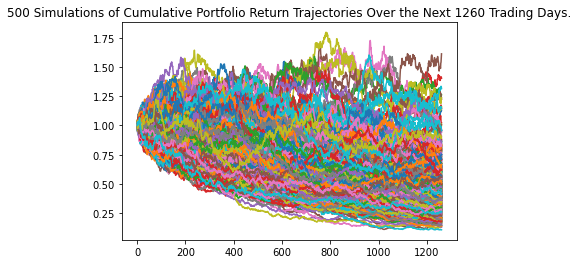

In [50]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

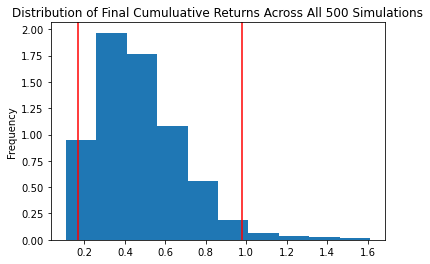

In [52]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              0.474928
std               0.221133
min               0.107566
25%               0.314834
50%               0.434752
75%               0.600462
max               1.612548
95% CI Lower      0.167834
95% CI Upper      0.981020
Name: 1260, dtype: float64


In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $1678.34 and $9810.2


Today's date: 2020-12-08


d1 = 08/12/2020
d2 = December 08, 2020
d3 = 12/08/20
d4 = Dec 08 2020
